In [285]:
import pandas as pd

df = pd.read_csv('DatafE.csv')
df

,Fecha,RSSID,VBat,VIn,humedad,irradiancia,precipitacion,presion,temperatura,Name
0,2022-03-10,-54.352080,3.864793,3.443567,65.925216,13.257973,0.0,893.579773,26.471980,E2_00020
1,2022-03-11,-47.095139,4.136003,4.982577,60.724895,6.209209,0.0,894.695983,26.917351,E2_00020
2,2022-03-12,-47.492874,4.152114,4.982824,62.689425,4.593925,0.0,894.190516,27.236085,E2_00020
3,2022-03-13,-52.373470,4.152721,4.984325,59.449725,4.107051,0.0,895.693409,26.911476,E2_00020
4,2022-03-14,-52.306015,4.156373,4.984279,60.640508,3.773909,0.0,894.774151,27.534984,E2_00020
...,...,...,...,...,...,...,...,...,...,...
1594,2022-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E2_00015
1595,2022-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E2_00015
1596,2022-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E2_00015
1597,2022-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E2_00015


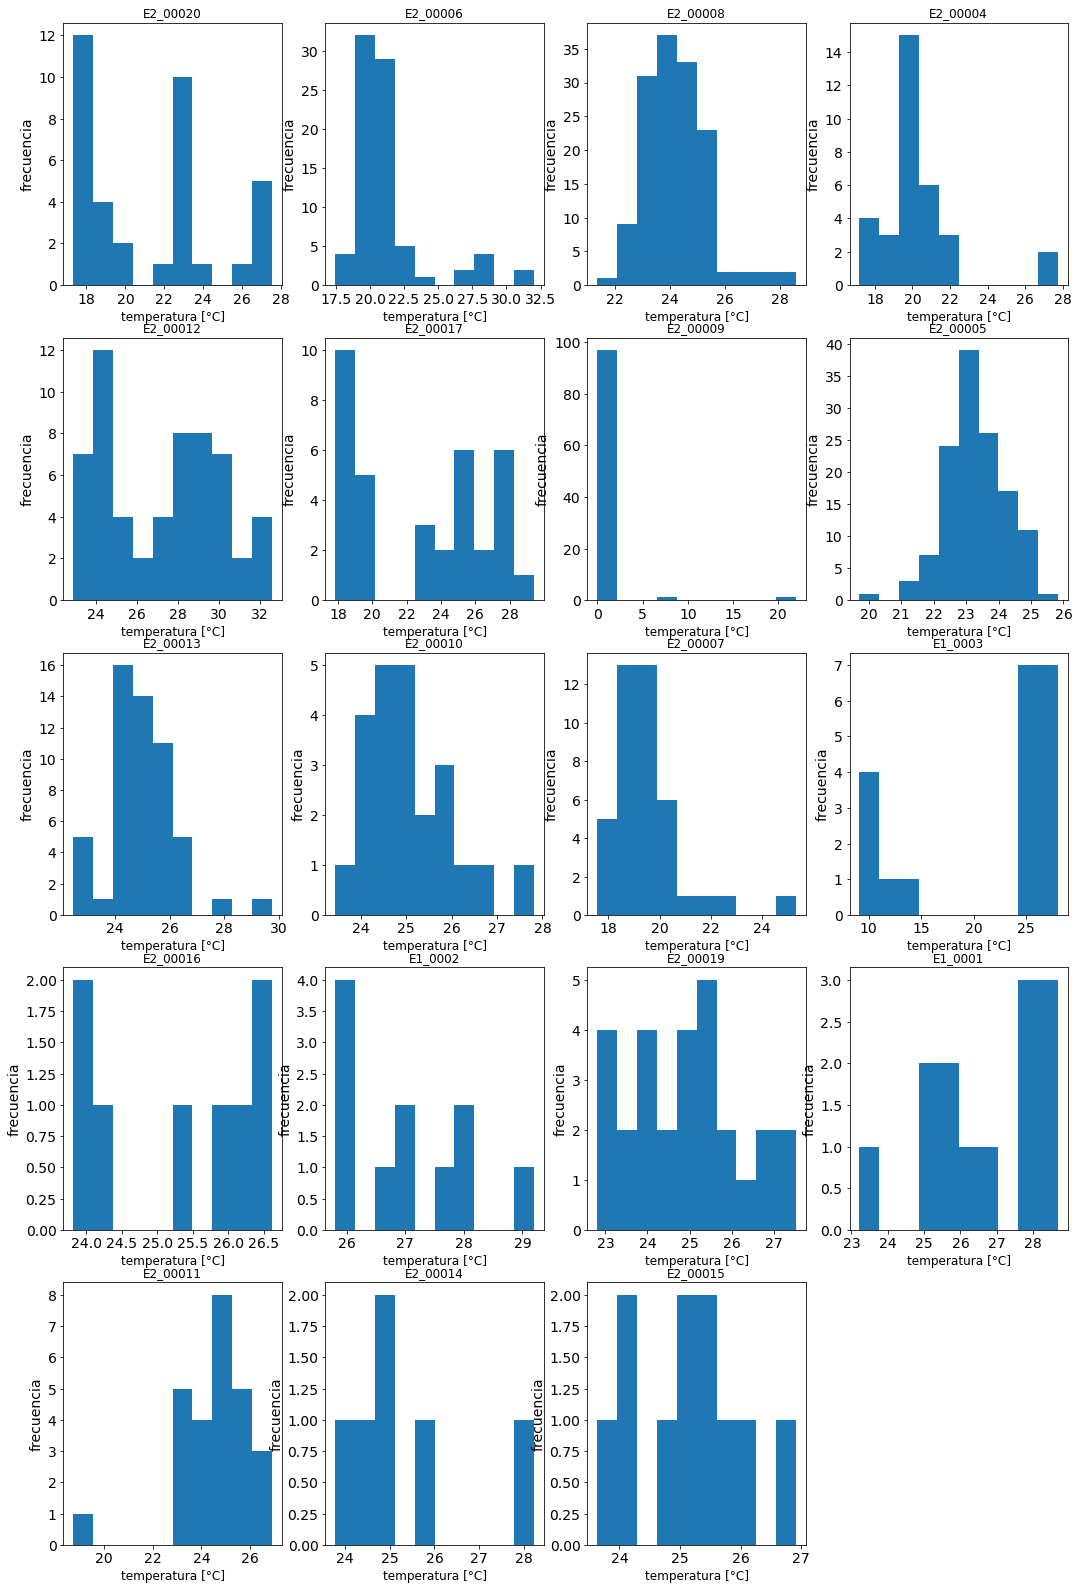

In [438]:
plt.figure(figsize=(18,28))
for i in range(len(indices)-1):
  devicetemp = df.iloc[indices[i]:indices[i+1],-2]
  plt.subplot(5,4,i+1)
  plt.hist(devicetemp)
  plt.xlabel('temperatura [°C]',fontsize=12)
  plt.xticks(fontsize=14)
  plt.ylabel('frecuencia',fontsize=14)
  plt.yticks(fontsize=14)
  plt.title(df['Name'][indices[i]])
#plt.savefig('histotemptomateE.svg')

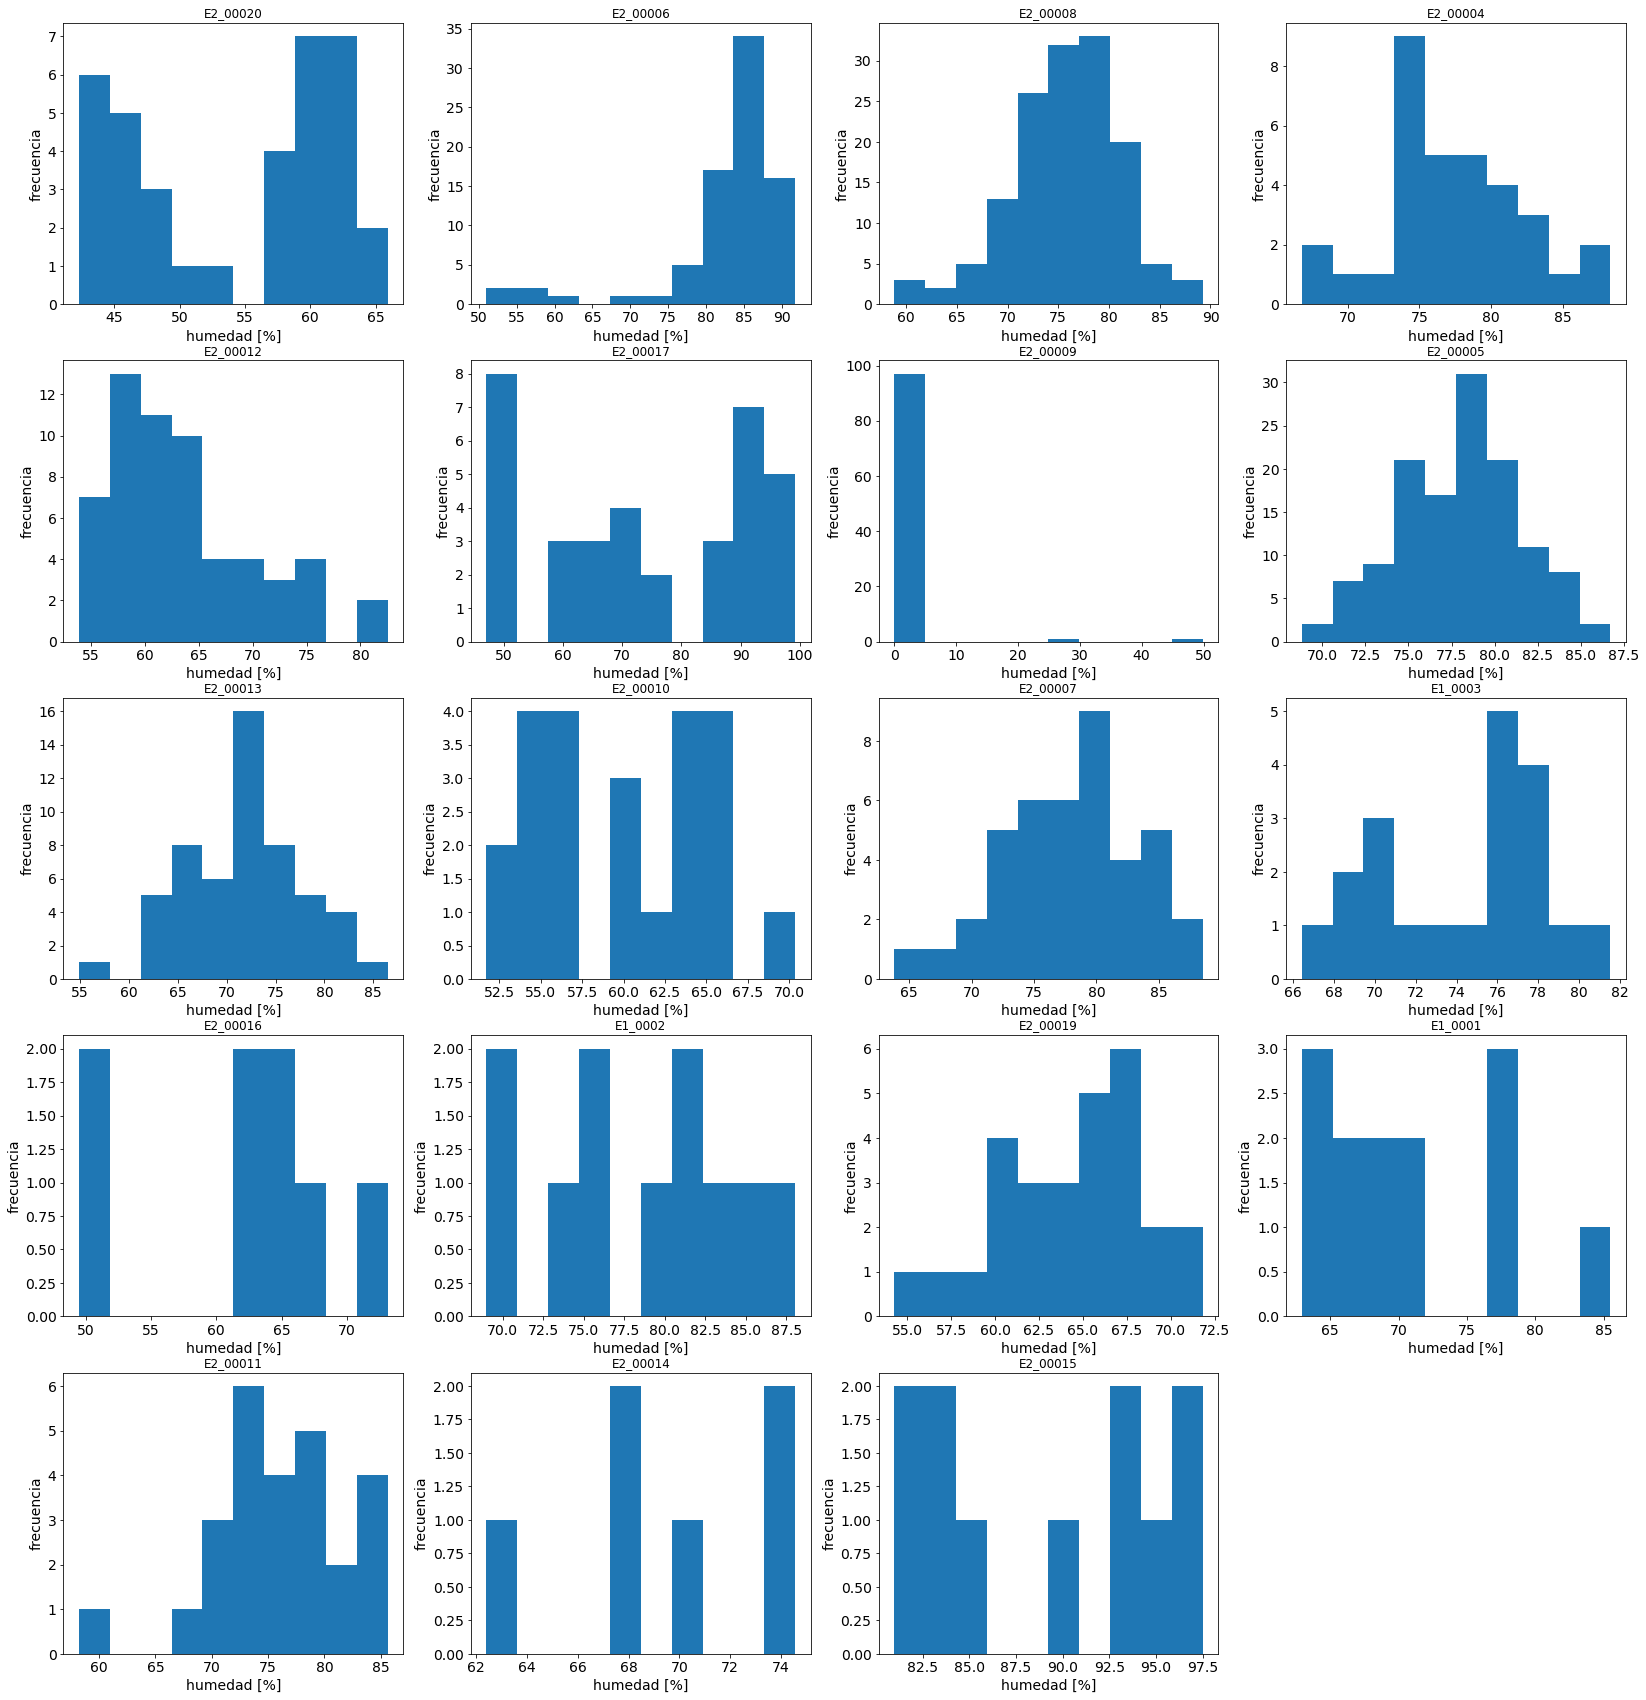

In [330]:
plt.figure(figsize=(28,30))
for i in range(len(indices)-1):
  devicehum = df.iloc[indices[i]:indices[i+1],4]
  plt.subplot(5,4,i+1)
  plt.hist(devicehum)
  plt.xlabel('humedad [%]',fontsize=14)
  plt.xticks(fontsize=14)
  plt.ylabel('frecuencia',fontsize=14)
  plt.yticks(fontsize=14)
  plt.title(df['Name'][indices[i]])
plt.savefig('histohumE.svg',format='svg')

In [287]:
my_column_changes = df["Name"].shift() != df["Name"]

In [574]:
judiaverde = pd.read_csv('judiaverde.csv')

In [575]:
judiaverde

,Unnamed: 0,judia verde.temperatura.general.minima,judia verde.temperatura.general.maxima,judia verde.temperatura.general.optima,judia verde.tiempo
0,0,12,25,18,"[60, 90]"


In [338]:
def histogramas(columna,min,max):
  disptemps = columna.dropna().values
  histo = plt.hist(disptemps)
  total_datos = sum(histo[0])
  #print(total_datos)
  datos_opt = 0
  for i in range(len(histo[0])):
    if histo[1][i]>=min and histo[1][i]<=max:
      datos_opt += histo[0][i]
  #print(datos_opt)
  #print(histo)
  return datos_opt/total_datos

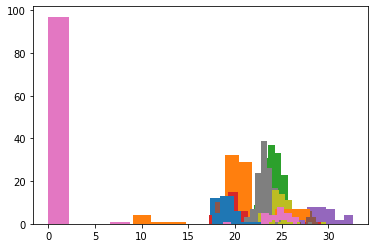

In [577]:
import numpy as np
import matplotlib.pyplot as plt

indices = np.where(my_column_changes)[0]
indices = np.append(indices,df.shape[0])
puntajestempg = []
puntajestempc = []
#puntajestempcn = []
#puntajestemppd = []
#puntajestemppn = []
puntajestemp = []
puntajeshum = []
tempmin = judiaverde['judia verde.temperatura.general.minima'][0]
tempmax = judiaverde['judia verde.temperatura.general.maxima'][0]
tempopt = judiaverde['judia verde.temperatura.general.optima'][0]
#tempgmin = judiaverde['judiaverde.temperatura.germinacion.minima'][0] # temperatura minima cultivo
#tempgmax = judiaverde['judiaverde.temperatura.germinacion.maxima'][0] # temperatura maxima cultivo
#tempgopt = judiaverde['judiaverde.temperatura.germinacion.optima'][0]
#tempcdmin = judiaverde['judiaverde.temperatura.crecimiento.minima'][0]
#tempcdmax = judiaverde['judiaverde.temperatura.crecimiento.maxima'][0]
#tempcnmin = judiaverde['judiaverde.temperatura.crecimiento noche.minima'][0]
#tempcnmax = judiaverde['judiaverde.temperatura.crecimiento noche.maxima'][0]
#tempcdopt = judiaverde['judiaverde.temperatura.crecimiento dia.optima'][0]
#temppdmin = judiaverde['judiaverde.temperatura.produccion dia.minima'][0]
#temppdmax = judiaverde['judiaverde.temperatura.produccion dia.maxima'][0]
#temppnmin = judiaverde['judiaverde.temperatura.produccion noche.minima'][0]
#temppnmax = judiaverde['judiaverde.temperatura.produccion noche.maxima'][0]
#temppopt = judiaverde['judiaverde.temperatura.produccion.optima'][0]
#hummin = judiaverde['judiaverde.humedad.general.minima'][0]
#hummax = judiaverde['judiaverde.humedad.general.maxima'][0]

for i in range(len(indices)-1):
  devicetemp = df.iloc[indices[i]:indices[i+1],-2]
  #puntajestempc.append(histogramas(devicetemp,tempcdmin,tempcdmax))
  #puntajestempg.append(histogramas(devicetemp,tempgmin,tempgmax))
  #puntajestempcn.append(histogramas(devicetemp,tempcnmin,tempcnmax))
  #puntajestemppn.append(histogramas(devicetemp,temppnmin,temppnmax))
  #puntajestempg.append(histogramas(devicetemp,np.mean([tempgmin,tempgopt]),np.mean([tempgmax,tempgopt])))
  #puntajestempcd.append(histogramas(devicetemp,np.mean([tempcdmin,tempcdopt]),np.mean([tempcdmax,tempcdopt])))
  puntajestemp.append(histogramas(devicetemp,np.mean([tempmin,tempopt]),np.mean([tempmax,tempopt])))
  #puntajestemp.append(histogramas(devicetemp,tempmin,tempmax))
  #devicehum = df.iloc[indices[i]:indices[i+1],4]
  #puntajeshum.append(histogramas(devicehum,hummin,hummax))

In [578]:
#puntajess = [puntajestempg,puntajestempc,puntajestempp,puntajeshum]
puntajess = [puntajestemp]

In [579]:
np.mean(puntajess,axis=0)

array([0.52777778, 0.82278481, 0.00704225, 0.93939394, 0.        ,
       0.42857143, 0.01010101, 0.03100775, 0.        , 0.        ,
       0.95121951, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03846154, 0.        , 0.        ])

In [580]:
dfarray = np.array([df.iloc[indices[:-1],-1].values,np.mean(puntajess,axis=0)])

In [581]:
dfarray = np.array([df.iloc[indices[:-1],-1].values,np.mean(puntajess,axis=0)])

In [582]:
dfarray

array([['E2_00020', 'E2_00006', 'E2_00008', 'E2_00004', 'E2_00012',
        'E2_00017', 'E2_00009', 'E2_00005', 'E2_00013', 'E2_00010',
        'E2_00007', 'E1_0003', 'E2_00016', 'E1_0002', 'E2_00019',
        'E1_0001', 'E2_00011', 'E2_00014', 'E2_00015'],
       [0.5277777777777778, 0.8227848101265823, 0.007042253521126761,
        0.9393939393939394, 0.0, 0.42857142857142855,
        0.010101010101010102, 0.031007751937984496, 0.0, 0.0,
        0.9512195121951219, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.038461538461538464, 0.0, 0.0]], dtype=object)

In [583]:
puntajesmediadf = pd.DataFrame([dfarray[-1]],columns=dfarray[0])

In [584]:
puntajesmediadf

,E2_00020,E2_00006,E2_00008,E2_00004,E2_00012,E2_00017,E2_00009,E2_00005,E2_00013,E2_00010,E2_00007,E1_0003,E2_00016,E1_0002,E2_00019,E1_0001,E2_00011,E2_00014,E2_00015
0,0.527778,0.822785,0.007042,0.939394,0.0,0.428571,0.010101,0.031008,0.0,0.0,0.95122,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0


In [585]:
puntajesmediadf.to_csv('puntajesmedia_judiaverde.csv')

In [48]:
tempmin = disp1['temperatura'].min()
tempmax = disp1['temperatura'].max()
print([tempmin,tempmax],[maizdata['temperatura.general.minima'][0],maizdata['temperatura.general.maxima'][0]])

[22.76595674886976, 30.667862688666258] [18, 21]


In [203]:
dfferias = pd.read_csv('LasFerias.csv')

In [204]:
dfferias

,ts,PM10_lf,C_lf,OZONO_lf,NO_lf,NO2_lf,NOX_lf,Vel Viento_lf,Dir Viento_lf,Temperatura_lf,HR_lf,Precipitacion_lf,PresionBaro_lf,PM2.5_lf
0,2020-12-02 00:00:00,19.0,0.50487,4.512,3.416,18.563,22.024,0.7,1.0,12.3,78.90,0.0,564.0,NaN
1,2021-01-01 01:00:00,26.0,0.55981,3.107,4.745,18.793,23.527,0.4,2.0,12.1,79.74,0.0,564.0,26.0
2,2021-01-01 02:00:00,NaN,0.55195,2.217,6.609,19.059,25.667,0.9,2.0,12.4,77.83,0.0,564.0,52.0
3,2021-01-01 03:00:00,NaN,0.40560,4.941,3.880,13.645,17.510,1.6,44.0,12.3,75.62,0.0,563.0,41.0
4,2021-01-01 04:00:00,35.3,0.45736,2.776,7.016,14.442,21.482,0.7,276.0,11.9,77.81,0.0,563.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11637,2022-04-30 20:00:00,7.0,0.72228,1.549,27.027,15.016,42.093,1.2,97.0,11.9,61.90,0.0,564.0,4.0
11638,2022-04-30 21:00:00,7.0,1.05853,0.000,41.359,16.123,57.449,0.4,0.0,11.2,67.03,0.0,564.0,7.0
11639,2022-04-30 22:00:00,8.0,1.96640,0.000,94.860,18.308,113.150,0.0,355.0,10.6,71.03,0.0,565.0,8.0
11640,2022-04-30 23:00:00,20.9,1.57563,0.000,78.082,15.109,93.215,1.0,87.0,9.9,74.07,0.0,565.0,18.0


(array([ 157.,  668., 2704., 2810., 1358., 1143., 1380.,  996.,  316.,
          31.]),
 array([ 7.3 ,  8.93, 10.56, 12.19, 13.82, 15.45, 17.08, 18.71, 20.34,
        21.97, 23.6 ]),
 <a list of 10 Patch objects>)

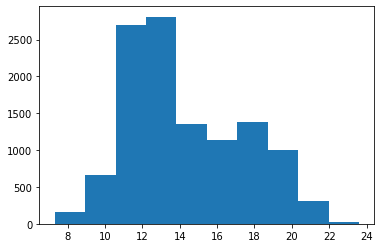

In [208]:
plt.hist(dfferias['Temperatura_lf'].values)